In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, mean_absolute_error
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [5]:
# uncertainty for both MLL and Scikit are now sqrt(counts), but implemented differently (std dev versus rand err method in scikit)
# nuc and act trainsets use flat 5% unc/rand err
# 6.7% of the train set is reserved as test set (randomly in each case, but also implemented differently)

In [6]:
df = pd.read_csv(learn_gam + 'act32/reactor_dtree_tset1.0_act32_mimic_mll.csv').drop(columns='Unnamed: 0')
df['TrueY'].describe()['count']

29520

In [15]:
pwr = df.loc[df['TrueY'] == 'pwr']
bwr = df.loc[df['TrueY'] == 'bwr']
phwr = df.loc[df['TrueY'] == 'phwr']

In [16]:
total = df['TrueY'].describe()['count']
pwrfrac = len(pwr)/total
bwrfrac = len(bwr)/total
phwrfrac = len(phwr)/total
pwrfrac, bwrfrac, phwrfrac

(0.22437978041827777, 0.7629194772938952, 0.012700742287827044)

In [17]:
pwrfrac*pwrfrac + bwrfrac*bwrfrac + phwrfrac*phwrfrac

0.6325537235496066

In [18]:
accuracy_score(df['TrueY'], df['DTree'])

0.981202901414016

In [19]:
balanced_accuracy_score(df['TrueY'], df['DTree'], adjusted=True)

0.969895375966735

### MLL Results

In [5]:
job_act = 'Job0_unc0.05'
job = 'Job1_unc0.0'

# nuc_conc
n29mll = pd.read_csv(mll_nuc + 'train/' + job_act + '/' + job_act + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# acts
a32mll = pd.read_csv(mll_gam + 'act32/' + job_act + '/' + job_act + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
a9mll = pd.read_csv(mll_gam + 'act9/' + job_act + '/' + job_act + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
a4mll = pd.read_csv(mll_gam + 'act4/' + job_act + '/' + job_act + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# n113
d1mll113 = pd.read_csv(mll_gam + 'd1_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d2mll113 = pd.read_csv(mll_gam + 'd2_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d3mll113 = pd.read_csv(mll_gam + 'd3_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d4mll113 = pd.read_csv(mll_gam + 'd4_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d5mll113 = pd.read_csv(mll_gam + 'd5_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d6mll113 = pd.read_csv(mll_gam + 'd6_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll113 = [n29mll, a32mll, a9mll, d1mll113, d2mll113, d3mll113, d6mll113, d5mll113, d4mll113]

# n31
d1mll31 = pd.read_csv(mll_gam + 'd1_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d2mll31 = pd.read_csv(mll_gam + 'd2_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d3mll31 = pd.read_csv(mll_gam + 'd3_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d4mll31 = pd.read_csv(mll_gam + 'd4_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d5mll31 = pd.read_csv(mll_gam + 'd5_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d6mll31 = pd.read_csv(mll_gam + 'd6_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll31 = [n29mll, a32mll, a4mll, d1mll31, d2mll31, d3mll31, d6mll31, d5mll31, d4mll31]

# auto
d1mll_auto = pd.read_csv(mll_gam + 'd1_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d2mll_auto = pd.read_csv(mll_gam + 'd2_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d3mll_auto = pd.read_csv(mll_gam + 'd3_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d4mll_auto = pd.read_csv(mll_gam + 'd4_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d5mll_auto = pd.read_csv(mll_gam + 'd5_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d6mll_auto = pd.read_csv(mll_gam + 'd6_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll_auto = [n29mll, a32mll, a9mll, d1mll_auto, d2mll_auto, d3mll_auto, d6mll_auto, d5mll_auto, d4mll_auto]

In [6]:
dets = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
csv_end = '_mimic_mll.csv'
# for dataframes
algcol = ['knn31', 'dtree31', 'mll31', 'knn113', 'dtree113', 'mll113', 'knn_auto', 'dtree_auto', 'mll_auto']
scrcol  = ['Accuracy', 'Acc Std']
errcol = ['Neg MAE', 'MAE Std']
tfrac = '_tset1.0_'

## Results for Box Plots

In [ ]:
def get_scikit_results(pred, en_list):
    knn_list = []
    dtr_list = []
    for d in dets:
        learn_path = learn_gam
        if 'nuc' in d or 'act' in d:
            # scikit for 113 and 31 lists will both have knn nuc29 & act32 as their starting points
            # then act4, act9 get applied to n31, n113 respectively 
            if d == 'act4/9':
                if en_list == '31':
                    d = 'act4'
                else:
                    ##### applying act9 to auto, although this isn't accurate #####
                    d = 'act9'
            else:
                if 'nuc' in d:
                    learn_path = learn_nuc
        knncsv = pred + '_knn' + tfrac + d + csv_end
        dtrcsv = pred + '_dtree' + tfrac + d + csv_end
        knn = pd.read_csv(learn_path + en_list + '/' + knncsv).drop(columns='Unnamed: 0')
        dtr = pd.read_csv(learn_path + en_list + '/' + dtrcsv).drop(columns='Unnamed: 0')
        knn_list.append(knn['AbsError'])
        dtr_list.append(dtr['AbsError'])
    return knn_list, dtr_list

def get_mll_results(pred, en_list):
    
    
    return mll_list

def get_results(pred, en_list):
    knn, dtr = get_scikit_results(pred, en_list)
    mll = get_mll_results(pred, en_list)
    return data

In [ ]:
def boxplot(pred, en_list):
    return

## Results for Error Bar Plots

In [7]:
def rxtr_metrics(i, j, df, d, mll, knn, dtr):
    llmetric = '_Score'
    dfmetric = 'Accuracy'
    dfstd = 'Acc Std'
    errname = 'AbsError'    
    for en_list in ['31', '_auto', '113']:
        ### MLL ###
        df.loc[d, ('mll'+en_list, dfmetric)] = balanced_accuracy_score(mll[en_list][j][predmll[i]], mll[en_list][j]['pred_' + predmll[i]], adjusted=True)
        df.loc[d, ('mll'+en_list, dfstd)] = mll[en_list][j][predmll[i] + llmetric].std()
        ### Scikit ###
        for a, A, alg in zip(['knn', 'dtree'], ['kNN', 'DTree'], [knn, dtr]):
            df.loc[d, (a+en_list, dfmetric)] = balanced_accuracy_score(alg[en_list]['TrueY'], alg[en_list][A], adjusted=True)
            df.loc[d, (a+en_list, dfstd)] = alg[en_list][errname].std()
    return df

def reg_metrics(i, j, df, d, mll, knn, dtr):
    llmetric = '_Error'
    dfmetric = 'Neg MAE'
    dfstd = 'MAE Std'
    errname = 'AbsError'    
    for en_list in ['31', '_auto', '113']:
        ### MLL ###
        df.loc[d, ('mll'+en_list, dfmetric)] = -mean_absolute_error(mll[en_list][j][predmll[i]], mll[en_list][j]['pred_' + predmll[i]])
        df.loc[d, ('mll'+en_list, dfstd)] = mll[en_list][j][predmll[i] + llmetric].std()
        ### Scikit ###
        for a, A, alg in zip(['knn', 'dtree'], ['kNN', 'DTree'], [knn, dtr]):
            df.loc[d, (a+en_list, dfmetric)] = -mean_absolute_error(alg[en_list]['TrueY'], alg[en_list][A])
            df.loc[d, (a+en_list, dfstd)] = alg[en_list][errname].std()
    return df

In [9]:
extra_dir = 'test_0.067_only/'
results = {}
for i, p in enumerate(pred):
    if p == 'reactor':
        levels = [algcol, scrcol]
    else: 
        levels = [algcol, errcol]
    df = pd.DataFrame(index=dets, columns=pd.MultiIndex.from_product(levels, names=["Algorithm", "Metric"]))
    for j, d in enumerate(dets):
        ######################
        ### Scikit Results ###
        ######################
        learn_path = learn_gam + extra_dir
        knncsv = p + '_knn' + tfrac + d + csv_end
        dtrcsv = p + '_dtree' + tfrac + d + csv_end
        if 'nuc' in d or 'act' in d:
            # scikit for 113 and 31 lists will both have knn nuc29 & act32 as their starting points
            # then act4, act9 get applied to n31, n113 respectively 
            if d == 'act4/9':
                knncsv = p + '_knn' + tfrac + 'act4' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act4' + csv_end
                knn31 = pd.read_csv(learn_path + 'act4/' + knncsv).drop(columns='Unnamed: 0')
                dtr31 = pd.read_csv(learn_path + 'act4/' + dtrcsv).drop(columns='Unnamed: 0')
                knncsv = p + '_knn' + tfrac + 'act9' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act9' + csv_end
                ##### applying act9 to auto, although this isn't accurate #####
                knn_auto = knn113 = pd.read_csv(learn_path + 'act9/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr113 = pd.read_csv(learn_path + 'act9/' + dtrcsv).drop(columns='Unnamed: 0')
            else:
                if 'nuc' in d:
                    learn_path = learn_nuc + extra_dir
                knn_auto = knn31 = knn113 = pd.read_csv(learn_path + d + '/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr31 = dtr113 = pd.read_csv(learn_path + d + '/' + dtrcsv).drop(columns='Unnamed: 0')
        else:
            knn_auto = pd.read_csv(learn_path + 'auto/' + knncsv).drop(columns='Unnamed: 0')
            dtr_auto = pd.read_csv(learn_path + 'auto/' + dtrcsv).drop(columns='Unnamed: 0')
            knn31 = pd.read_csv(learn_path + 'n31/' + knncsv).drop(columns='Unnamed: 0')
            dtr31 = pd.read_csv(learn_path + 'n31/' + dtrcsv).drop(columns='Unnamed: 0')
            knn113 = pd.read_csv(learn_path + 'n113/' + knncsv).drop(columns='Unnamed: 0')
            dtr113 = pd.read_csv(learn_path + 'n113/' + dtrcsv).drop(columns='Unnamed: 0')
        ###################
        ### Error Calcs ###
        ###################
        mll = {'31' : mll31, '_auto' : mll_auto, '113' : mll113}
        knn = {'31' : knn31, '_auto' : knn_auto, '113' : knn113}
        dtr = {'31' : dtr31, '_auto' : dtr_auto, '113' : dtr113}
        if p == 'reactor':        
            df = rxtr_metrics(i, j, df, d, mll, knn, dtr)
        else:
            df = reg_metrics(i, j, df, d, mll, knn, dtr)
    results[p] = df

In [ ]:
results['reactor']

# Plotting

In [10]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
_x = np.arange(len(x))
d_x = [-0.2, 0, 0.2]
ens = ['_auto', '31', '113']
en_lbl = ['Auto', '31', '113']
algs = ['dtree', 'knn', 'mll']
alg_lbl = ['Dec Tree', 'kNN', 'MLL Calc']
c_ens = ['M', 'M', 'M']
c_algs = ['L', 'M', 'D']
c = ['Teal', 'Brwn', 'Purp']

In [11]:
def plot_by_enlist(a, ax, fig, plotdf, metric, std):
    ax.set_title(en_lbl[a]+' Energy Windows', fontsize=16)
    for i in range(0,3):
        y = np.array(plotdf[algs[i]+ens[a]][metric], dtype=float)
        sd = np.array(plotdf[algs[i]+ens[a]][std], dtype=float)
        _, _, bars = ax.errorbar(_x+d_x[i], y, yerr=sd, color=colors[c_ens[i]+c[i]], marker='o', linestyle='None', mew=0, ms=7, elinewidth=3, label=alg_lbl[i])
        plt.xticks(_x, x)
        [bar.set_alpha(0.4) for bar in bars]
        #ax.plot(x, y, 'o-', color=colors[c_ens[i]+c[i]], mew=0, ms=5, label=alg_lbl[i])
        #ax.fill_between(x, y - sd, y + sd, color=colors[c_ens[i]+c[i]], alpha=0.35)
    ax.legend(loc='lower center', ncol=3)
    return fig

def plot_by_alg(a, ax, fig, plotdf, metric, std):
    ax.set_title(alg_lbl[a], fontsize=16)
    for i in range(0,3):
        y = np.array(plotdf[algs[a]+ens[i]][metric], dtype=float)
        sd = np.array(plotdf[algs[a]+ens[i]][std], dtype=float)
        _, _, bars = ax.errorbar(_x+d_x[i], y, yerr=sd, color=colors[c_algs[i]+c[a]], marker='o', linestyle='None', mew=0, ms=7, elinewidth=3, label=en_lbl[i])
        [bar.set_alpha(0.4) for bar in bars]
        plt.xticks(_x, x)
        #ax.plot(x, y, 'o-', color=colors[c_algs[i]+c[a]], mew=0, ms=5, label=en_lbl[i])
        #ax.fill_between(x, y - sd, y + sd, color=colors[c_algs[i]+c[a]], alpha=0.35)
    ax.legend(loc='lower center', title='Energy Windows', ncol=3)
    return fig

In [12]:
def plot(pred_param, title, plttype):
    plt.clf()
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,6))
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        axs[0].set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    plotdf = results[pred_param]
    for a, ax in enumerate(axs):
        if plttype == 'enlist':
            plot_by_enlist(a, ax, fig, plotdf, metric, std)
        else:
            plot_by_alg(a, ax, fig, plotdf, metric, std)
        ax.tick_params(labelsize=12, labelrotation=45)
        if pred_param == 'cooling': 
            ax.set_ylim(-350, 49)
    
    fig.suptitle(title, fontsize=22)
    fig.subplots_adjust(top=.85)
    plt.show()
    
    #sv_fig = './plots/fb_detector_preds_wrt_' + plttype + '_' + pred_param + '.png'
    #fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

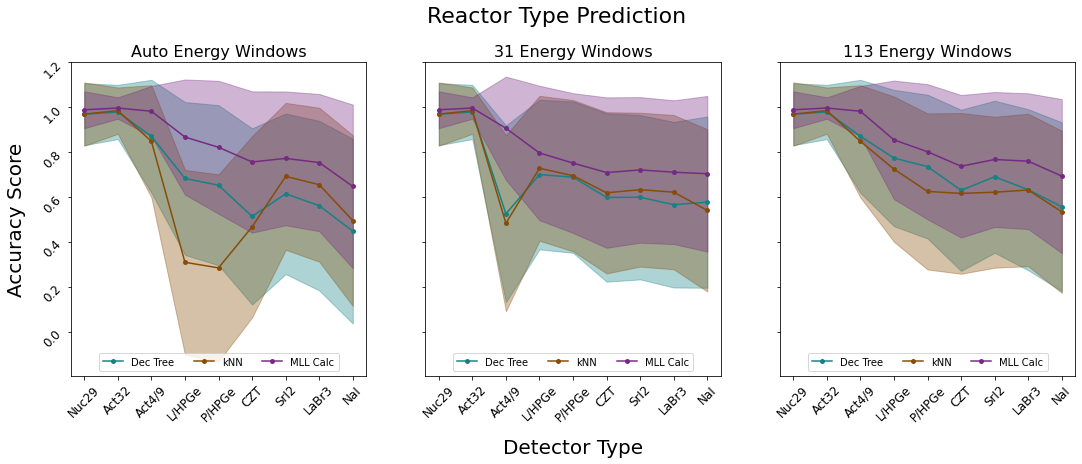

<Figure size 432x288 with 0 Axes>

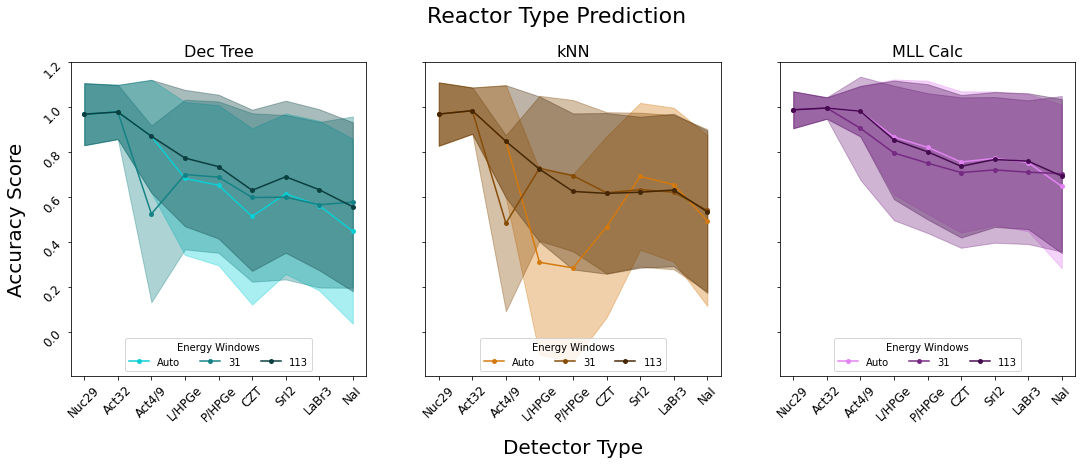

In [13]:
plot('reactor', 'Reactor Type Prediction', 'enlist')
plot('reactor', 'Reactor Type Prediction', 'alg')
# balanced accuracy score now used

<Figure size 432x288 with 0 Axes>

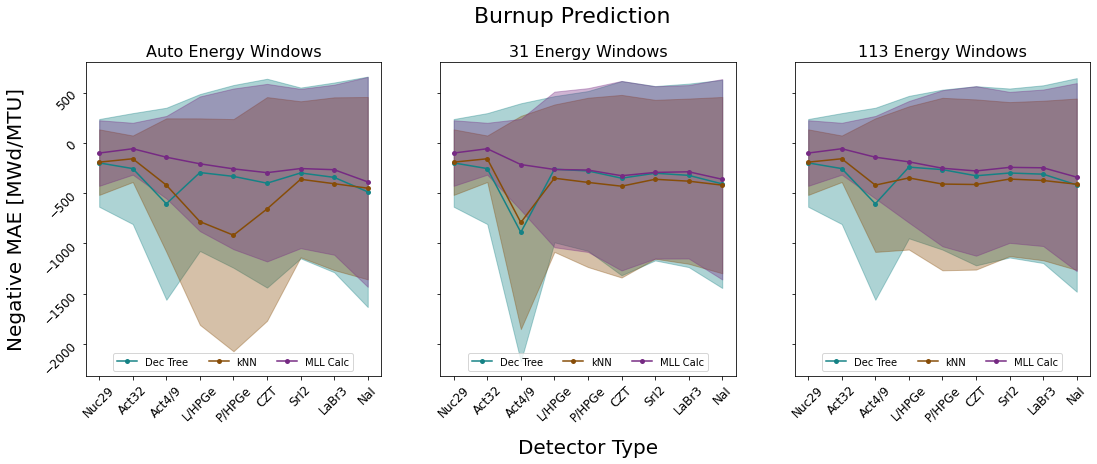

<Figure size 432x288 with 0 Axes>

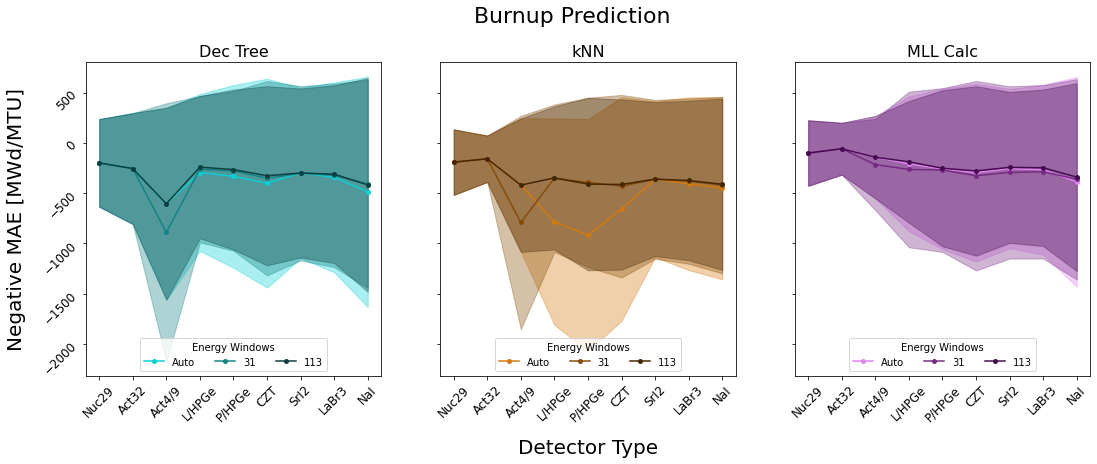

In [14]:
plot('burnup', 'Burnup Prediction', 'enlist')
plot('burnup', 'Burnup Prediction', 'alg')

<Figure size 432x288 with 0 Axes>

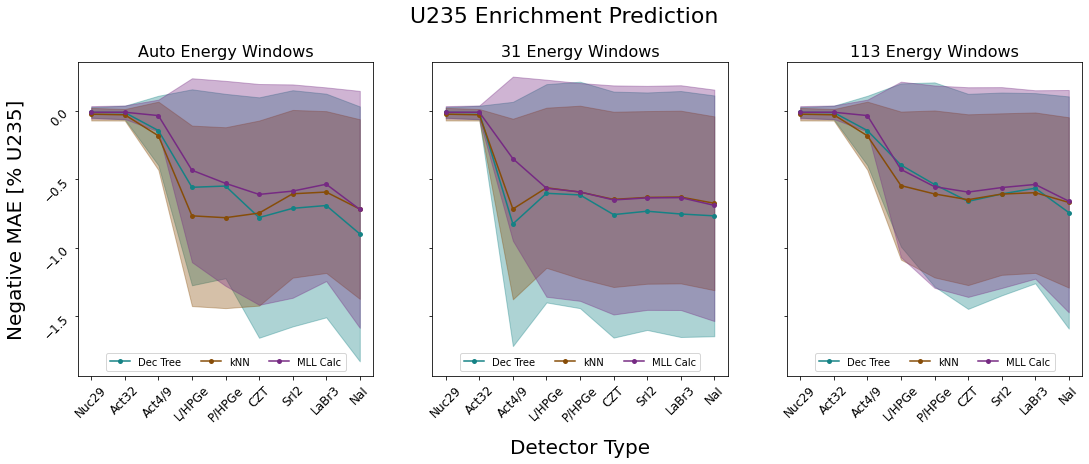

<Figure size 432x288 with 0 Axes>

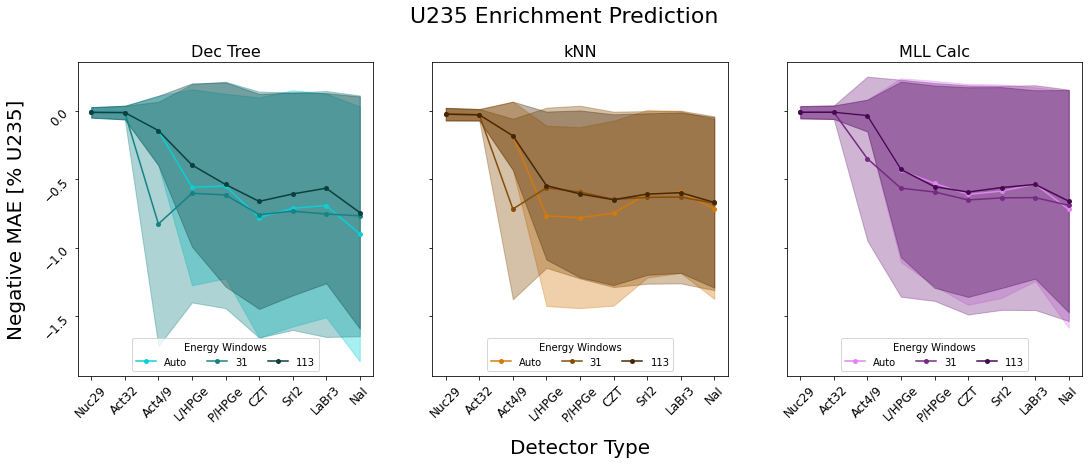

In [15]:
plot('enrichment', 'U235 Enrichment Prediction', 'enlist')
plot('enrichment', 'U235 Enrichment Prediction', 'alg')

<Figure size 432x288 with 0 Axes>

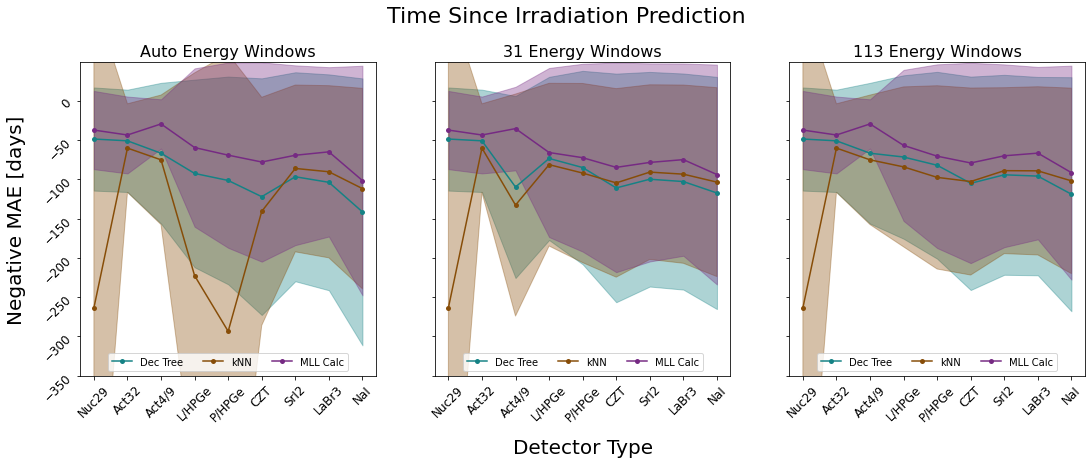

<Figure size 432x288 with 0 Axes>

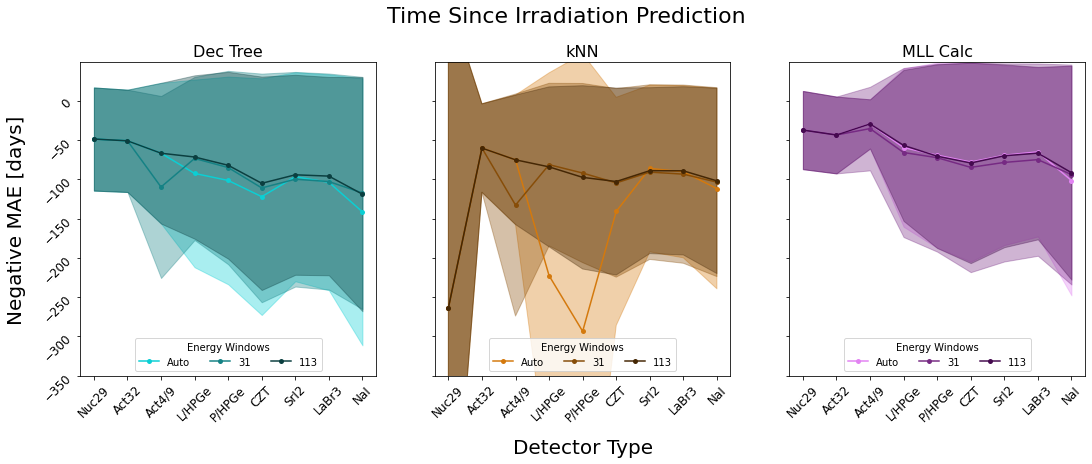

In [16]:
plot('cooling', 'Time Since Irradiation Prediction', 'enlist')
plot('cooling', 'Time Since Irradiation Prediction', 'alg')

In [17]:
# using more trainset for knn makes a huge difference. 
#this high error for knn for cooling time/nuc29 is easily resolved